## In this case study, we investigate the relationships between glucose levels, and other features, and make predictions based on this variable to gain insights into their impact on patient health.

## **Load the apropriate libraries to performe our analysis and models**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from jupyterthemes import jtplot
jtplot.style('onedork')

In [2]:
df = pd.read_csv("E:\data\diabetes.csv")
df = df.rename(columns={'DiabetesPedigreeFunction': 'PedigreeFunc'})
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   PedigreeFunc   768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
PedigreeFunc     0
Age              0
Outcome          0
dtype: int64


 ## **Descriptive Statistics and Analysis**

In [4]:
df.iloc[:, :-1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


generate a list with all the columns 

In [5]:
df_columns = df.columns
df_columns = df_columns.tolist()
df_columns 

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'PedigreeFunc',
 'Age',
 'Outcome']

Skewness & Kustosis

In [6]:
skewness = df[df_columns[:-1]].skew()
kurtosis = df[df_columns[:-1]].kurtosis()

print(f'skewness:\n{skewness}, \nkurtosis:\n{kurtosis}')

skewness:
Pregnancies      0.901674
Glucose          0.173754
BloodPressure   -1.843608
SkinThickness    0.109372
Insulin          2.272251
BMI             -0.428982
PedigreeFunc     1.919911
Age              1.129597
dtype: float64, 
kurtosis:
Pregnancies      0.159220
Glucose          0.640780
BloodPressure    5.180157
SkinThickness   -0.520072
Insulin          7.214260
BMI              3.290443
PedigreeFunc     5.594954
Age              0.643159
dtype: float64


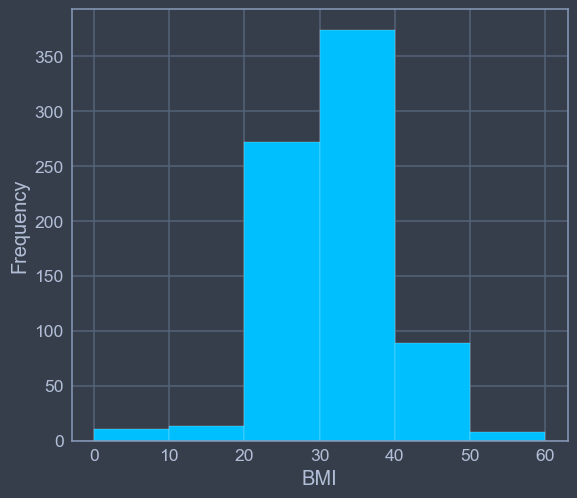

The appropriate number of bins are: 7


In [7]:
def bins(column):   
  # this function calculates the bin for the column you pass on the argument
  q= np.ceil(1 + 3.32 * np.log10(df[column].count()))
  R = df[column].max() - df[column].min()
  c = np.ceil(R/q)
  edg = np.arange(df[column].min(), df[column].max(), +10, c)
  return edg
  print(f"q: {q}\nR: {R}\nc: {c}\nedg: {edg}")

def histo(column):   #this function returns the graph of the column with its bins 
  edg = bins(column) 
  plt.hist(df[column], bins=edg, color='deepskyblue',edgecolor='white',zorder=2)
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()
  print(f"The appropriate number of bins are: {len(edg)}") 

column = 'BMI'
histo(column)


(120.89453125, 117.0, 99, 31.97261819513622, 99.0, 140.25)


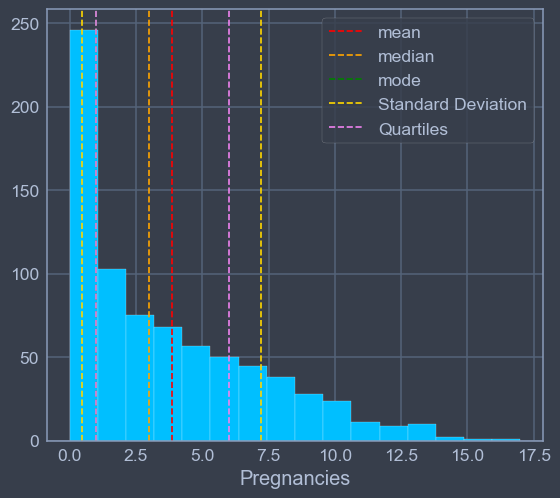

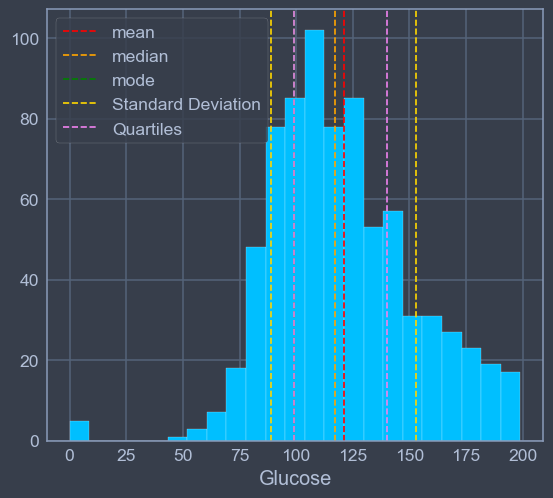

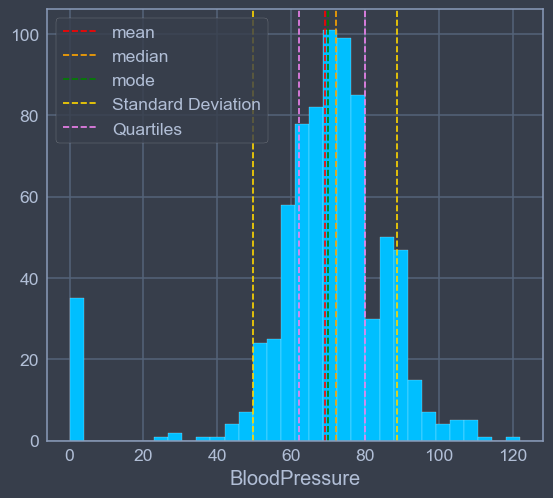

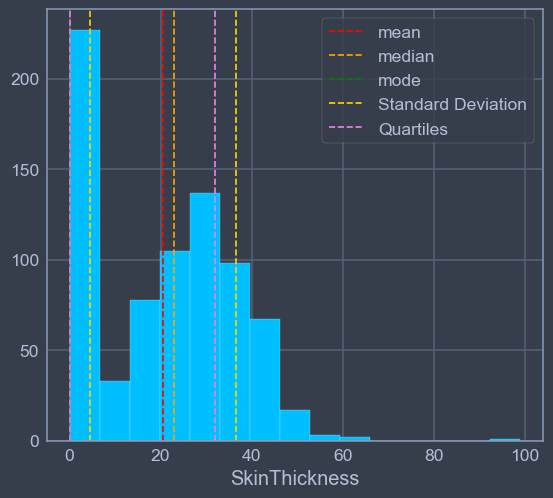

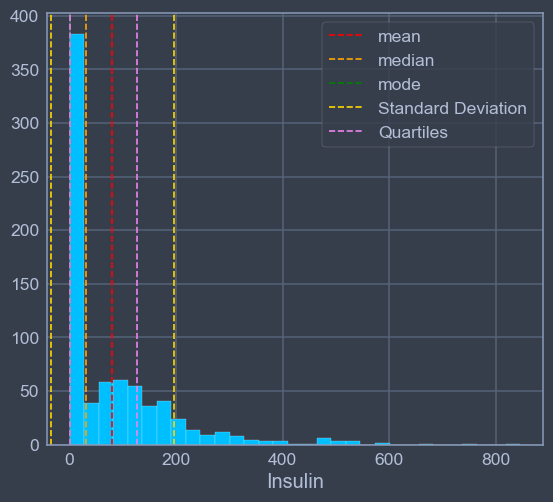

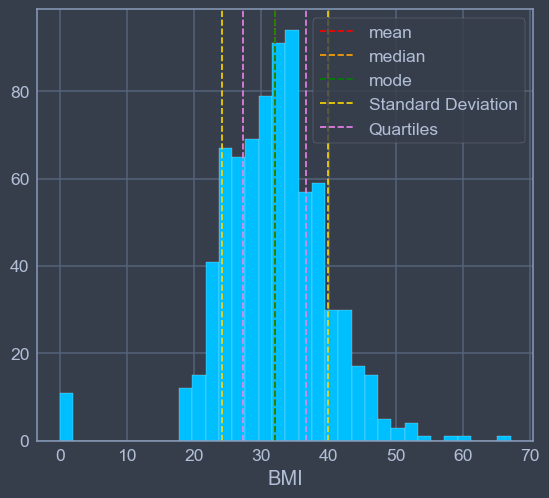

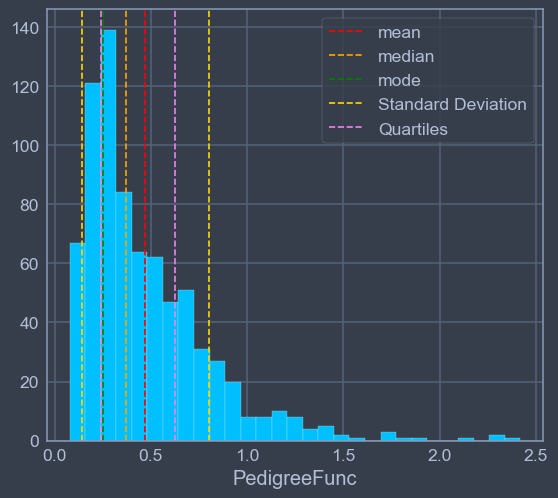

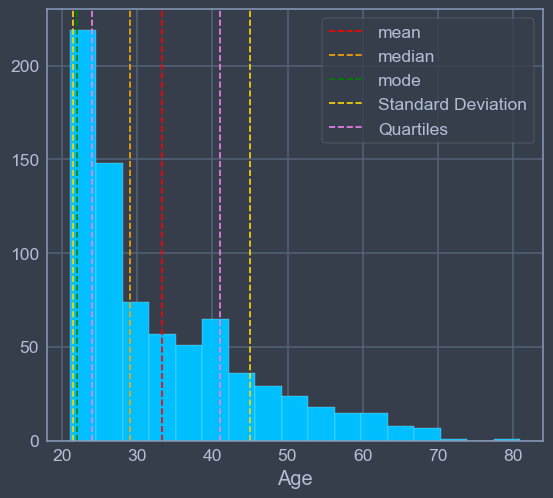

In [8]:
def statistic(measure):  
#this function calculates the bellow statistical measures for the given column
  mean = df[measure].mean()
  median = df[measure].median()
  mode = df[measure].mode()[0]
  std = df[measure].std()
  q1 = df[measure].quantile(0.25)
  q3 = df[measure].quantile(0.75)
  return mean, median, mode, std, q1, q3

print(statistic('Glucose'))

def stats_plot(measure):
  for plot in df_columns[:-1]:
    measure = plot
    mean, median, mode, std, q1, q3 = statistic(measure)

    plt.hist(df[measure], bins='auto', color='deepskyblue',edgecolor='white',zorder=2)
    plt.axvline(mean, color ='red', linestyle='dashed',label='mean')
    plt.axvline(median, color='orange',linestyle='dashed',label='median')
    plt.axvline(mode, color='green',linestyle='dashed',label='mode')
    plt.axvline(mean + std, color='gold', linestyle='dashed', label='Standard Deviation')
    plt.axvline(mean - std, color='gold', linestyle='dashed')
    plt.axvline(q1, color='violet', linestyle='dashed', label='Quartiles')
    plt.axvline(q3, color='violet', linestyle='dashed')
    plt.xlabel(measure)
    plt.legend()
    plt.show()

stats_plot('Glucose')

## **Plotting Correlations**

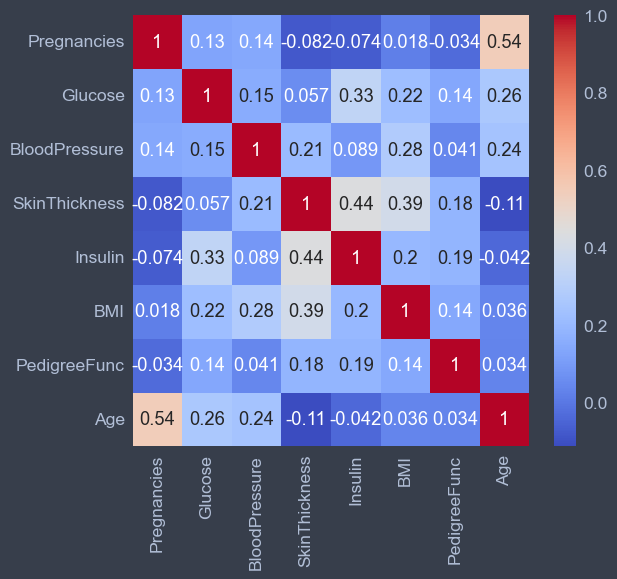

In [9]:
cor = df.iloc[:, :-1].corr()
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.show()

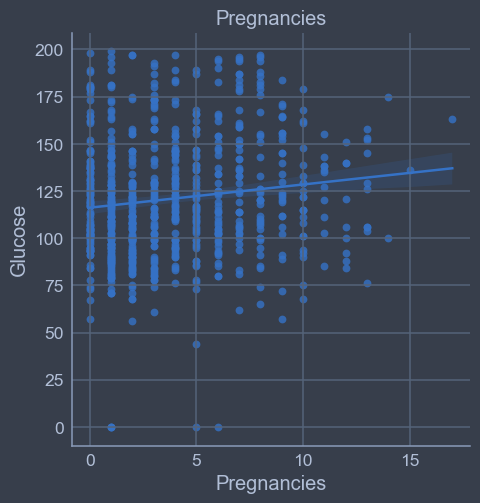

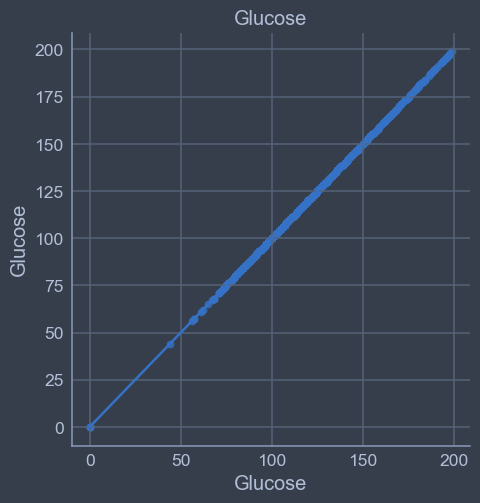

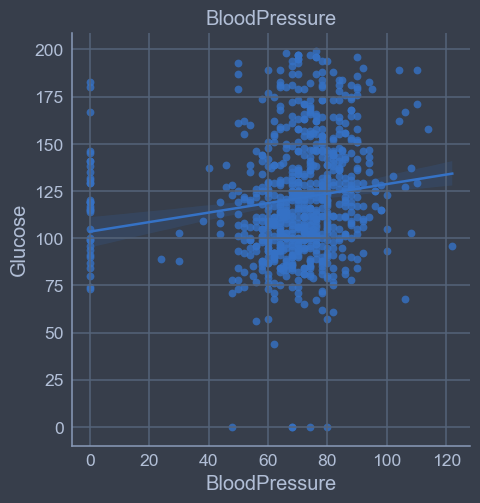

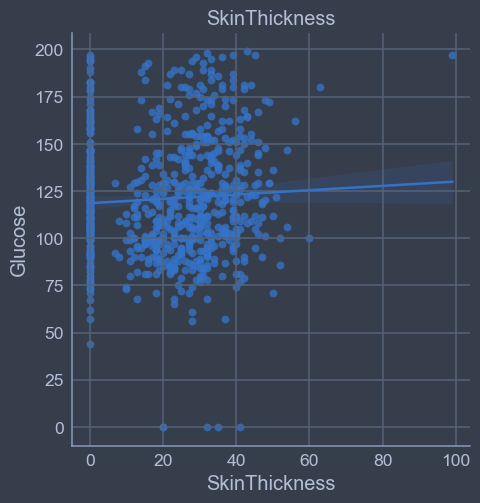

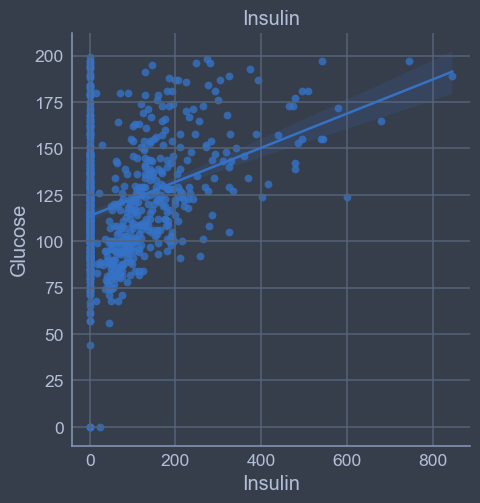

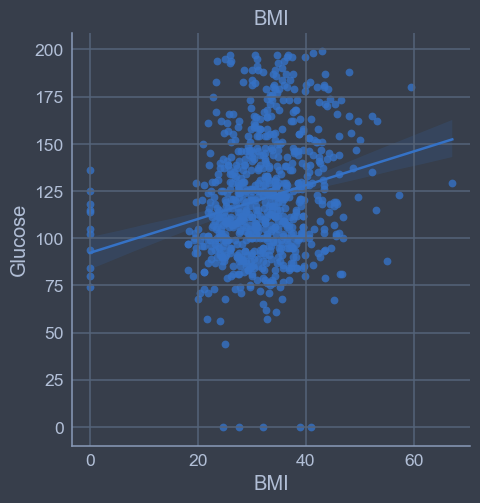

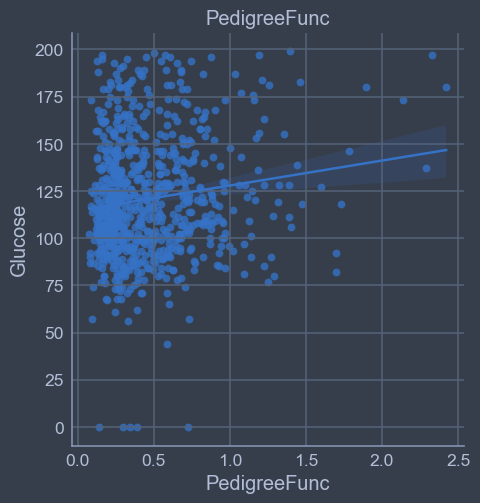

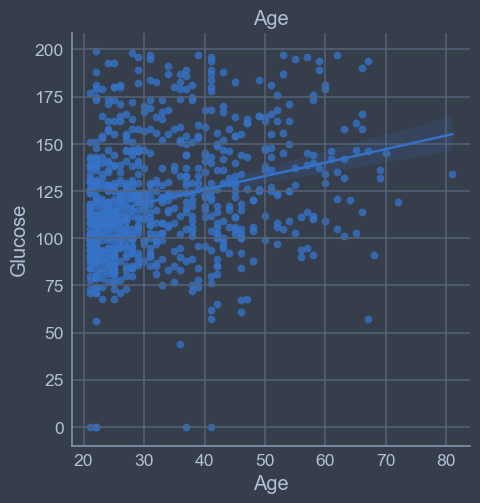

In [10]:
for label in df_columns[:-1]:
  sns.lmplot(data=df, x=label, y="Glucose")
  plt.title(label)
  plt.ylabel("Glucose")
  plt.xlabel(label)
  plt.show()

## **Detecting Outliers**

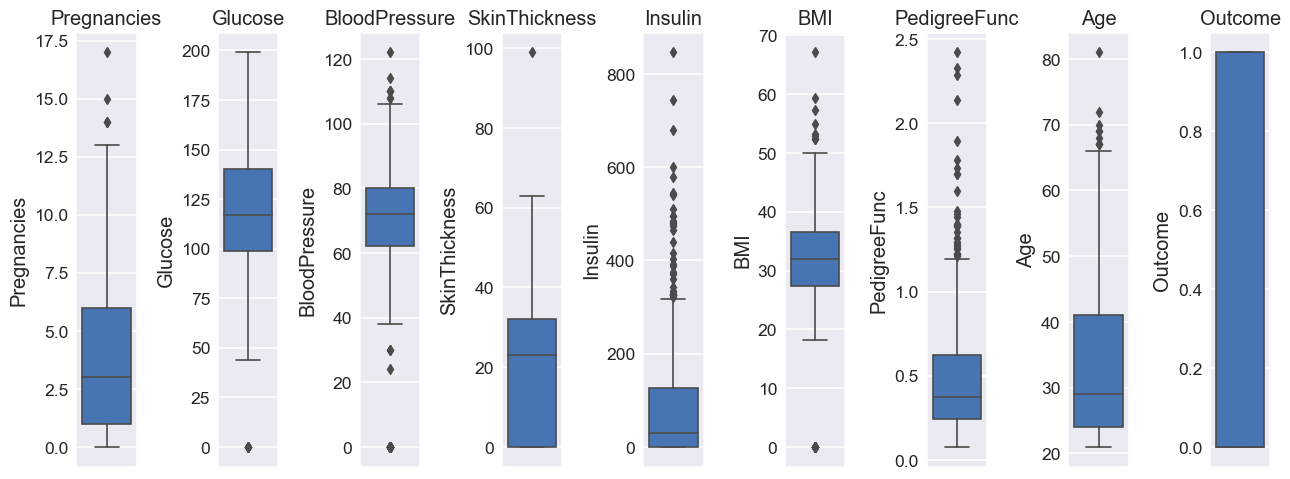

In [11]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, len(df.columns), figsize=(13, 5))
for i, col in enumerate(df.columns):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

## Removing outliers using InterQuartile Range (IQR) method 

In [12]:
#removing all the zero values from clucose 
df = df[df["Glucose"] != 0]
df = df[df["SkinThickness"] != 99]

In [13]:
#When we call the remove_outliers function separately for each column, 
#the function is applied to each column independently. 
#This means that the upper and lower bounds for outlier removal are calculated
# separately for each column based on that column's data.
def remove_outliers(arg1, arg2, arg3,df=df):
    quant1 = df[arg1].quantile(arg2)
    quant3 = df[arg1].quantile(arg3)
    iqr = quant3 - quant1
    lower_bound = arg2
    upper_bound = quant3 + 1.5 * iqr
    df = df[(df[arg1] >= lower_bound) & (df[arg1] <= upper_bound)]
    return df

<AxesSubplot:>

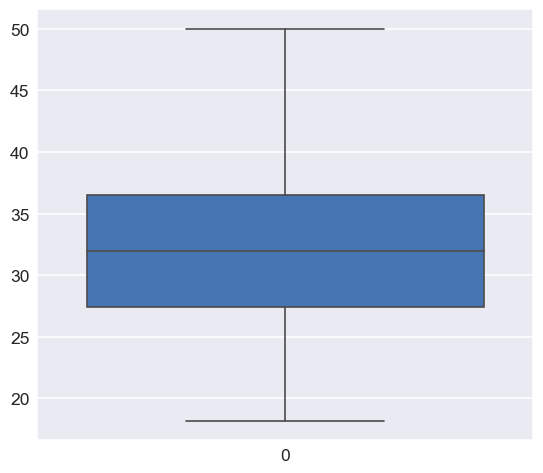

In [14]:
#every time we call the function, it removes the outlier for the column
#but if we call it for another column, the previous outlier removal will
#be reseted. ( independently removes )

clean_df = remove_outliers("BMI",0.10, 0.68)
sns.boxplot(data=clean_df["BMI"])

Now BMI variable follows a normal distribution

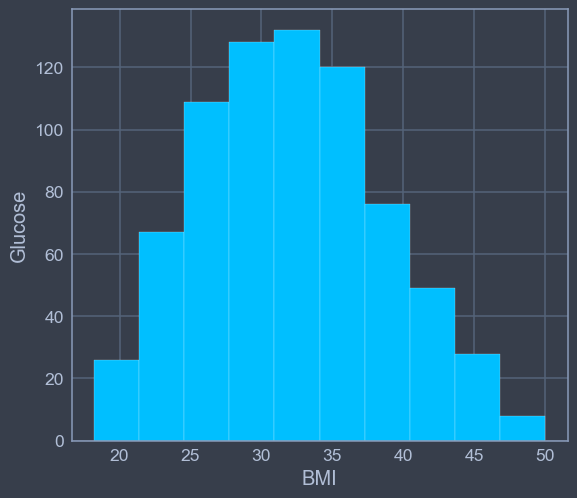

In [55]:
jtplot.style('onedork')
plt.hist(clean_df["BMI"],color='deepskyblue',edgecolor='white',zorder=2)
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.show()

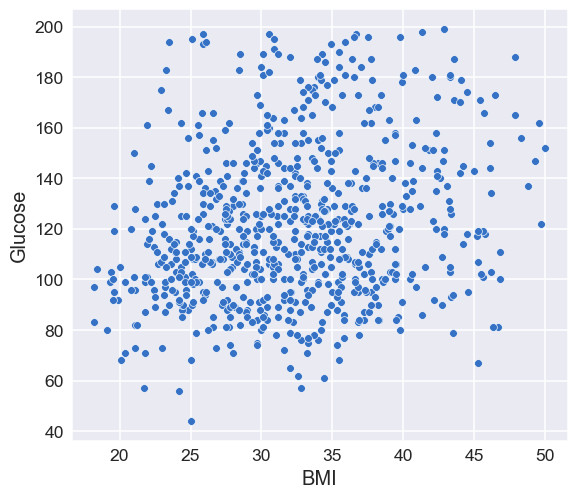

Original DataFrame shape: (762, 9)
Cleaned DataFrame shape: (743, 9)


In [15]:
sns.scatterplot(data=clean_df,x="BMI",y="Glucose")
plt.show()

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", clean_df.shape)

## **Linear Regression** 

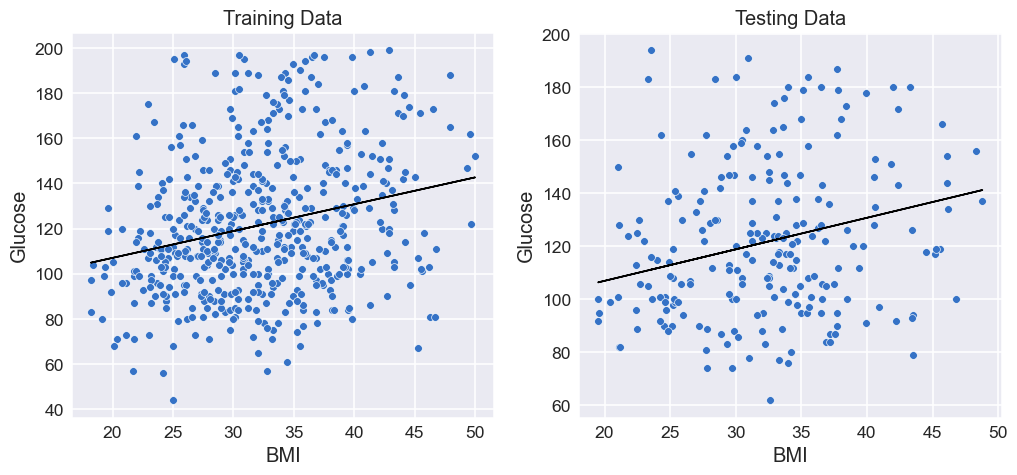

In [15]:
x_value = clean_df['BMI']
y_value = clean_df['Glucose']

X_train, X_test, y_train, y_test = train_test_split(x_value, y_value, test_size=0.3, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
y_pred = lr_model.predict(X_test.values.reshape(-1,1))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train, y=y_train)
plt.plot(X_train, lr_model.predict(X_train.values.reshape(-1, 1)), color='black')
plt.title('Training Data')
plt.xlabel('BMI')
plt.ylabel('Glucose')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test, y=y_test)
plt.plot(X_test, y_pred, color='black')
plt.title('Testing Data')
plt.xlabel('BMI')
plt.ylabel('Glucose')

plt.show()

We will performe linear regression on 'BMI' as the independent variable (x_value) and 'Glucose' as the dependent variable (y_value). The dataset is split into training ( 70% of the data ) and testing ( 30% of the data). The training set is used to fit a Linear Regression model and estimate values for the testing set.

Two scatter plots are generated, one for the training data and the other for the testing data,were every dot is a representation of a BMI value and a Gluvose value. Both plots have 'BMI' on the x-axis and 'Glucose' on the y-axis. In each plot, the black line represents the line of best fit generated by the Linear Regression model.

If the model fits the data well, the points on the scatter plot will be closely clustered around the line of best fit.

## **Normalization**

In [16]:
normalized_df = pd.DataFrame(normalize(clean_df), columns=clean_df.columns)

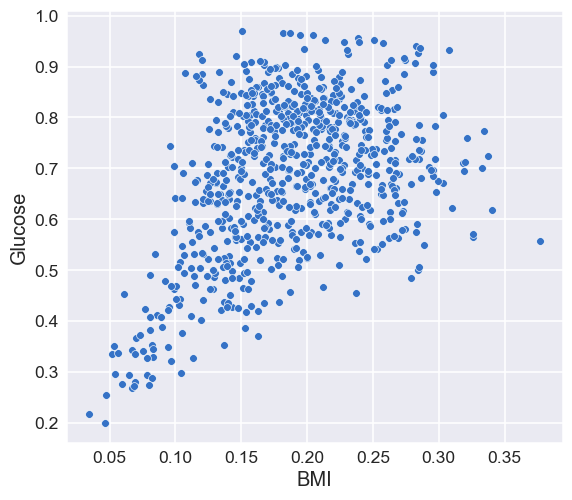

In [17]:

sns.scatterplot(data=normalized_df,x="BMI",y="Glucose")
plt.show()

**Building a model for the normalized data and the original data**

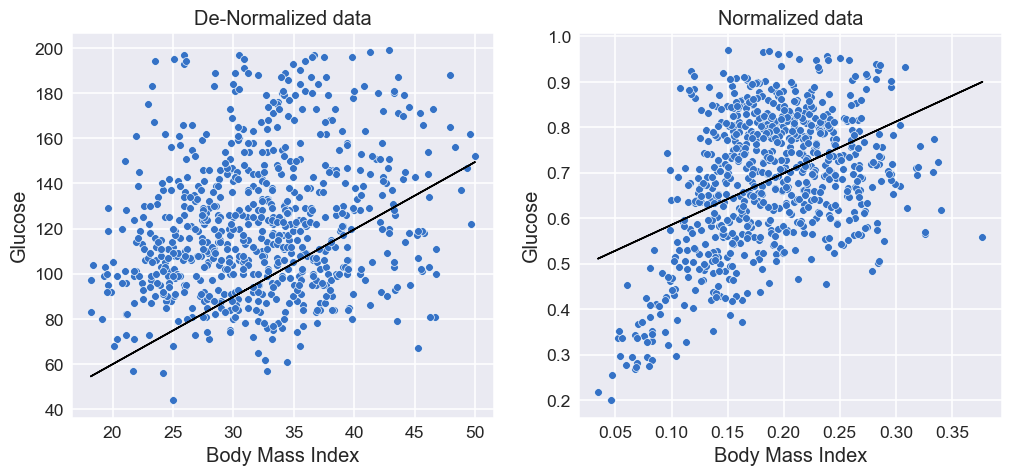

slope 1.1353284954704328
intercept 0.4719461759621026
Normalized: y = 1.1353284954704328 * x + 0.4719461759621026
_________________________________________________________________
slope 2.9858237478711755
intercept 0.19540875338767727
De-Normalized: y = 2.9858237478711755 * x + 0.19540875338767727


In [25]:
p = np.polyfit(normalized_df["BMI"],normalized_df["Glucose"],1)
slope = p[0]
intercept = p[1]
# de-normalize the slope and intercept
slope2 = slope * (normalized_df["Glucose"].std() / normalized_df["BMI"].std())
intercept2 = intercept * normalized_df["Glucose"].std() + normalized_df["Glucose"].mean() - slope2 * normalized_df["BMI"].mean()

# this function is referred to the de-normalized data
def line(x): 
   return slope2*x + intercept2

# this function is referred to the normalized data
def reg(x): 
   return slope*x + intercept

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
predicted_glucose_clean = line(clean_df["BMI"])
sns.scatterplot(data=clean_df, x="BMI",y="Glucose")
plt.plot(clean_df["BMI"], predicted_glucose_clean, color = "black")
plt.title("De-Normalized data")
plt.xlabel("Body Mass Index")
plt.ylabel("Glucose")


plt.subplot(1, 2, 2)
predicted_glucose = reg(normalized_df["BMI"]) 
sns.scatterplot(data=normalized_df, x="BMI",y="Glucose")
plt.plot(normalized_df["BMI"], predicted_glucose, color = "black")
plt.title("Normalized data")
plt.xlabel("Body Mass Index") 
plt.ylabel("Glucose")
plt.show()


print(f"slope {p[0]}")
print(f"intercept {p[1]}") 
print(f"Normalized: y = {slope} * x + {intercept}")
print("_________________________________________________________________")
print(f"slope {slope2}")
print(f"intercept {intercept2}")
print(f"De-Normalized: y = {slope2} * x + {intercept2}")

In [26]:
print(reg(42))

48.15574298572028


## **Evaluation metrics**

In [34]:
print("De-normalized data")
y_predicted = line(clean_df["BMI"])  #predicted values
residuals = clean_df["Glucose"] - y_predicted 

RSS = np.sum(residuals**2) # sum of squares
n = len(clean_df)
k = 2 # parameters
AIC =  2 * k - 2* np.log(RSS/n).round(3) 
print("AIC: ", AIC)

#_____________________________________________________________
MSE = mean_squared_error(clean_df["Glucose"],y_predicted).round(3)
print("MSE: ", MSE)

#_____________________________________________________________
BIC = k *np.log(n) - 2 * np.log(RSS/n).round(3)
print("BIC: ", BIC)

#_____________________________________________________________
x_mean = clean_df["BMI"].mean()
y_mean = clean_df["Glucose"].mean()

total_sum_of_squares=np.sum(( clean_df["Glucose"] - y_mean)**2)
sum_of_squares_of_residuals = np.sum(clean_df["Glucose"] - (slope2 * predicted_glucose_clean + intercept2)**2) 

R_squared =  1 - (sum_of_squares_of_residuals / total_sum_of_squares).round(3)
print("R_squared:", R_squared)

De-normalized data
AIC:  -10.844
MSE:  1673.031
BIC:  -1.622607910564481
R_squared: 93.765


These evaluation metrics provide information about the performance and quality of our model.

1.   AIC (Akaike Information Criterion): AIC is a measure used for model selection, where lower values indicate a better model. It takes into account both the goodness of fit and the complexity of the model. In our case, the AIC value of -10.8446 suggests that our model is performing well, as it indicates a relatively low value.

2.   MSE (Mean Squared Error): MSE is a commonly used metric to measure the average squared difference between the predicted and actual values. It quantifies the overall accuracy of our model's predictions, where lower values indicate better performance. In our case, the MSE value of 1672.8969 suggests that, on average, the squared difference between our model's predictions and the actual values is relatively low.


3.   BIC (Bayesian Information Criterion): BIC, similar to AIC, is an information criterion used for model selection. Like AIC, lower BIC values indicate a better model. In our case, the BIC value of -1.6232 suggests that our model is performing well and has relatively low complexity.

4.   R-squared (coefficient of determination): R-squared measures the proportion of the variance in the dependent variable that can be explained by the independent variables in our model. It ranges from 0 to 100%, where higher values indicate a better fit. In our case, the R-squared value of 93.7763 suggests that our model explains approximately 93.78% of the variance in the dependent variable, indicating a good fit to the data.

Overall, our model fits well the data which means that our estimations are good.




In [35]:
print("Normalized data")
y_predicted2 = reg(normalized_df["BMI"])  #predicted values
residuals2 = normalized_df["Glucose"] - y_predicted2  
RSS2 = np.sum(residuals2**2) # sum of squares
n2 = len(normalized_df)
AIC2 =  2 * k - 2* np.log(RSS2/n2) .round(3)
print("AIC: ", AIC2)

#_____________________________________________________________
MSE2 = mean_squared_error(normalized_df["Glucose"],y_predicted2).round(3)
print("MSE: ", MSE2)

#_____________________________________________________________
BIC2 = k *np.log(n2) - 2 * np.log(RSS2/n2).round(3)
print("BIC: ", BIC2)

#_____________________________________________________________
x_ = normalized_df["BMI"].mean()
y_ = normalized_df["Glucose"].mean()

total_sum_of_squares2=np.sum(( normalized_df["Glucose"] - y_)**2)
sum_of_squares_of_residuals2 = np.sum(normalized_df["Glucose"] - (slope * predicted_glucose + intercept)**2) 

R_squared2 =  1 - (sum_of_squares_of_residuals2 / total_sum_of_squares2).round(3)
print("R_squared:", R_squared2)

Normalized data
AIC:  12.014
MSE:  0.018
BIC:  21.235392089435518
R_squared: 40.457


On the other hand if we normalize our data we have:


1.  AIC (Akaike Information Criterion) of 12.0144 value suggests that our model may not be the best fit for the data since it has a relatively higher value compared to other potential models. It implies that there may be other models that could provide a better balance between goodness of fit and complexity.
2.    the MSE value of 0.0182 suggests that, on average, the squared difference between our model's predictions and the actual values is relatively low.

3.   the BIC value of 21.2357 suggests that our model might not be the best fit for the data since it has a relatively higher value. 
4.   the R-squared value of 40.4583 indicates that our model explains approximately 40.46% of the variance in the dependent variable, which suggests that it might not capture a substantial amount of the variability present in the normalized data.

Based on these metrics, it appears that our model on normalized data may not be as effective as desired.


In [47]:
my_metrics = [["name", "de_normalized_data", "normalized_data" ],
           ["AIC", AIC,AIC2],
           ["MSE",MSE, MSE2],
           ["BIC",BIC, BIC2],
           ["R^2",R_squared,R_squared2]]
metrics = pd.DataFrame(my_metrics[1:], columns=my_metrics[0])
metrics

,name,de_normalized_data,normalized_data
0,AIC,-10.844000,12.014000
1,MSE,1673.031000,0.018000
2,BIC,-1.622608,21.235392
3,R^2,93.765000,40.457000


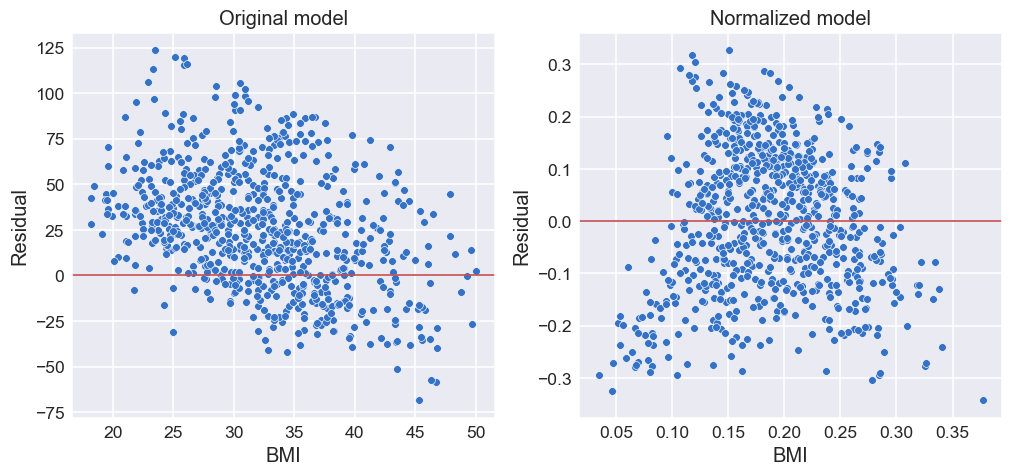

In [53]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=clean_df["BMI"], y=residuals)
plt.axhline(y=0, color='r', linestyle='-' )
plt.title('Original model')
plt.xlabel('BMI')
plt.ylabel('Residual')

plt.subplot(1, 2, 2)
sns.scatterplot(x=normalized_df["BMI"], y=residuals2)
plt.axhline(y=0, color='r', linestyle='-' )
plt.title('Normalized model')
plt.xlabel('BMI')
plt.ylabel('Residual')
plt.show()

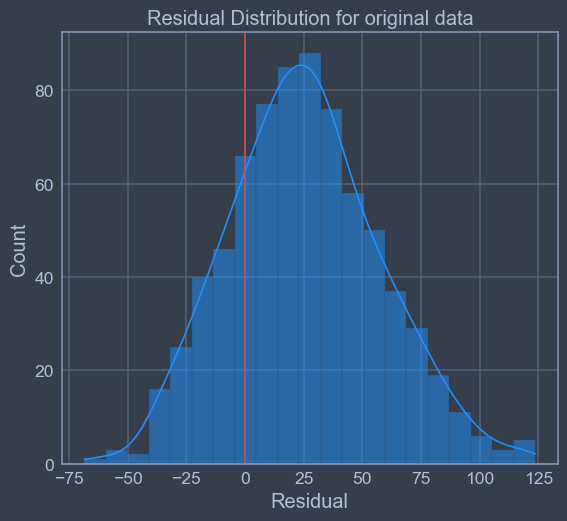

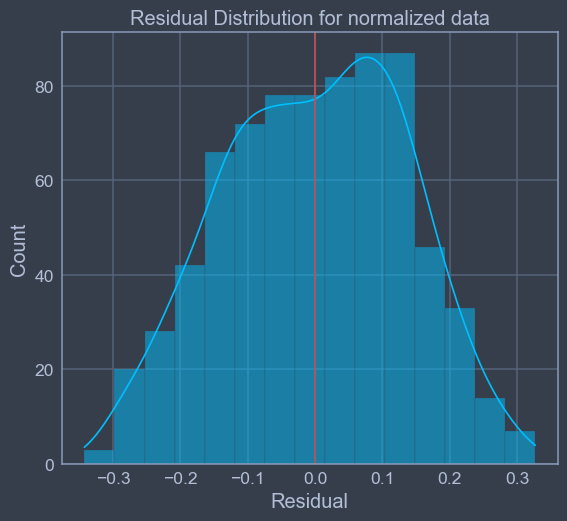

In [54]:
jtplot.style('onedork')

sns.histplot(residuals, kde=True, color='dodgerblue')
plt.axvline(x=0, color='r', linestyle='-' )
plt.title('Residual Distribution for original data')
plt.xlabel('Residual')
plt.show()


sns.histplot(residuals2, kde=True, color='deepskyblue')
plt.axvline(x=0, color='r', linestyle='-' )
plt.title('Residual Distribution for normalized data')
plt.xlabel('Residual')
plt.show()
